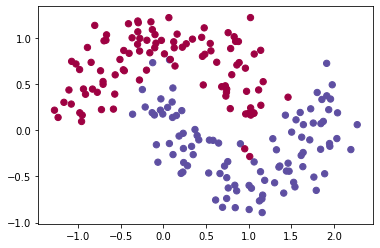

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

np.random.seed(3)

X0,yt0=datasets.make_moons(200,noise=0.20)
plt.scatter(X0[:,0],X0[:,1],s=40,c=yt0,cmap=plt.cm.Spectral)

Epoch 1/30
150/150 [==============================] - 0s 1ms/step - loss: 0.6088 - accuracy: 0.6733
Epoch 2/30
150/150 [==============================] - 0s 731us/step - loss: 0.5410 - accuracy: 0.7000
Epoch 3/30
150/150 [==============================] - 0s 919us/step - loss: 0.4957 - accuracy: 0.7400
Epoch 4/30
150/150 [==============================] - 0s 897us/step - loss: 0.4642 - accuracy: 0.7533
Epoch 5/30
150/150 [==============================] - 0s 841us/step - loss: 0.4404 - accuracy: 0.7600
Epoch 6/30
150/150 [==============================] - 0s 812us/step - loss: 0.4219 - accuracy: 0.7867
Epoch 7/30
150/150 [==============================] - 0s 731us/step - loss: 0.4070 - accuracy: 0.8133
Epoch 8/30
150/150 [==============================] - 0s 708us/step - loss: 0.3947 - accuracy: 0.8200
Epoch 9/30
150/150 [==============================] - 0s 731us/step - loss: 0.3842 - accuracy: 0.8267
Epoch 10/30
150/150 [==============================] - 0s 859us/step - loss: 0.3753 

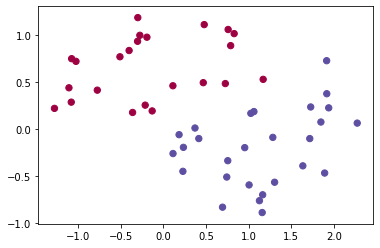

In [6]:
x_train = X0[:150]
y_train = yt0[:150]
# => testing set
x_test = X0[150:]
y_test = yt0[150:]

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.8, nesterov=True)
model.compile(loss='binary_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train,epochs=30,batch_size=1)
score = model.evaluate(x_test, y_test, batch_size=1)


prediction=model.predict(x_test,batch_size=1)
error=0.0
for i in range(len(x_test)):
  if prediction[i]>=0.5:
    prediction[i]=1
  else:
    prediction[i]=0
  l=prediction[i]-y_test[i]
  error += l**2

y = [y for p in prediction for y in p]

plt.scatter(x_test[:,0],x_test[:,1],s=40,c=y,cmap=plt.cm.Spectral)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x233e91b2408>)

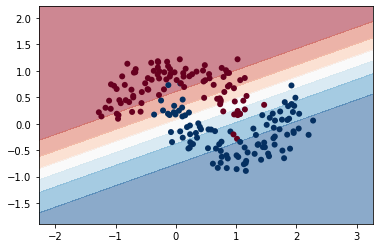

In [8]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)
    
    return fig, ax

plot_decision_boundary(X0,yt0,model,cmap='RdBu')